# PA KELOMPOK 1 KECERDASAN BUATAN

### NAMA ANGGOTA KELOMPOK : 
### - Hadie Pratama Tulili
### - Rafi Izdihar
### - Muhammad Firdaus

## Table Of Contents

1. [Tujuan Dibuatnya Program](#1.-Tujuan-Dibuatnya-Program)
2. [Library yang digunakan](#2.-Library-yang-digunakan)
3. [Directory List](#3.-Directory-List)
2. [Library yang digunakan](#2.-Library-yang-digunakan)
2. [Library yang digunakan](#2.-Library-yang-digunakan)
2. [Library yang digunakan](#2.-Library-yang-digunakan)


# 1. Tujuan Dibuatnya Program

1. Untuk mengaplikasikan Convolutional Neural Networks (CNN) untuk memprediksi tipe kue khas indonesia.

2. Untuk mengklasifikasikan setiap gambar kue ke salah satu dari 8 kategori : 
    **kue_risoles, kue_lumpur, kue_kastengel, kue_dadar_gulung, kue_putri_salju, kue_klepon,kue_serabi, kue_lapis**
    
3. Jumlah data training yang digunakan sebesar ??? sampel, jumlah data testing sebesar ??? sampel serta jumlah data validation sebesar ??? sampel.

# 2. Library yang digunakan

In [83]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# 3. Directory List

In [84]:
train_path = './cakes-dataset/train/'
test_path = './cakes-dataset/test/'
val_path = './cakes-dataset/validation/'

In [121]:
#Training
train = tf.keras.utils.image_dataset_from_directory(train_path,
                                                            batch_size=32,                                                        
                                                            image_size=(128, 128),
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)

#Validation
validation = tf.keras.utils.image_dataset_from_directory(val_path,
                                                            batch_size=32,
                                                            image_size=(128, 128),
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)


#Testing
test = tf.keras.utils.image_dataset_from_directory(test_path,
                                                            batch_size=32,
                                                            image_size=(128, 128),
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)                                                            

Found 1642 files belonging to 4 classes.
Found 392 files belonging to 4 classes.
Found 512 files belonging to 4 classes.


In [107]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                rotation_range = 0.45,
                                zoom_range = 0.2,
                                horizontal_flip = True,
                                fill_mode = 'nearest')

training_set = train_datagen.flow_from_directory(train_path,
                                                batch_size=32,
                                                target_size=(128, 128),
                                                shuffle=True,
                                                color_mode = "rgb",
                                                class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255,
                                rotation_range = 0.45,
                                zoom_range = 0.2,
                                horizontal_flip = True,
                                fill_mode = 'nearest')

validation_set = val_datagen.flow_from_directory(val_path,
                                                batch_size=32,
                                                target_size=(128, 128),
                                                shuffle=True,
                                                color_mode = "rgb",
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255,
                                rotation_range = 0.45,
                                zoom_range = 0.2,
                                horizontal_flip = True,
                                fill_mode = 'nearest')

test_set = test_datagen.flow_from_directory(test_path,
                                                batch_size=32,
                                                target_size=(128, 128),
                                                shuffle=True,
                                                color_mode = "rgb",
                                                class_mode='categorical')

Found 1642 images belonging to 4 classes.
Found 392 images belonging to 4 classes.
Found 512 images belonging to 4 classes.


In [ ]:
# class names
class_names = train.class_names
class_names

# Visualisasi

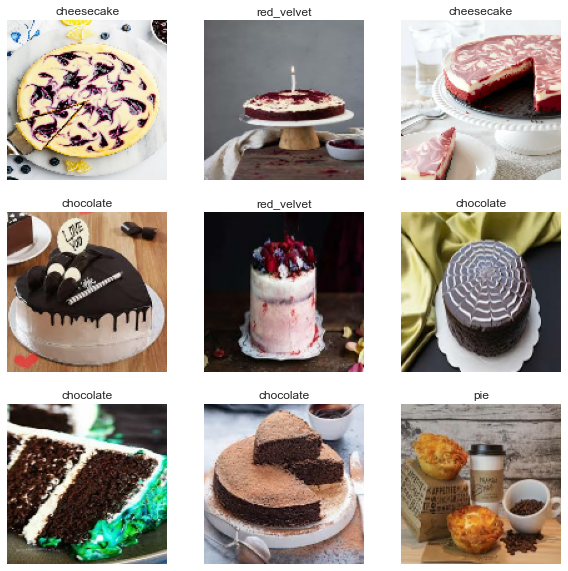

In [87]:
# data visualization
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [88]:
train_temp = train.unbatch()
labels_train = []
for x, y in train_temp:
    index = np.argmax(y)
    labels_train.append(class_names[index])

In [89]:
val_temp = validation.unbatch()
labels_val = []
for x, y in val_temp:
    index = np.argmax(y)
    labels_val.append(class_names[index])

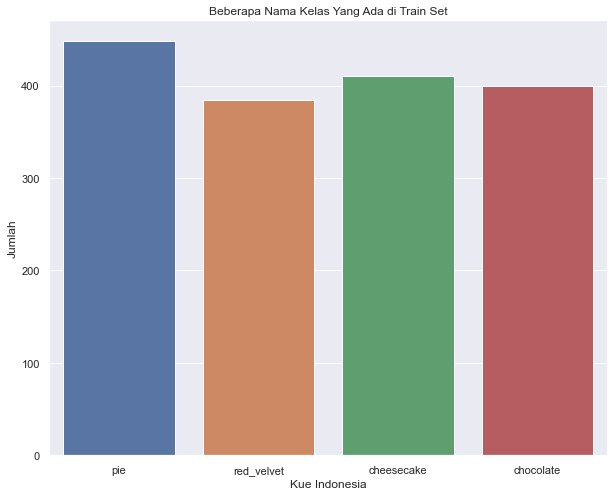

In [90]:
plt.figure(figsize=(10, 8))

sns.set_theme()

sns.countplot(x=labels_train)
plt.xlabel('Kue Indonesia')
plt.ylabel('Jumlah')
plt.title('Beberapa Nama Kelas Yang Ada di Train Set')
plt.show()

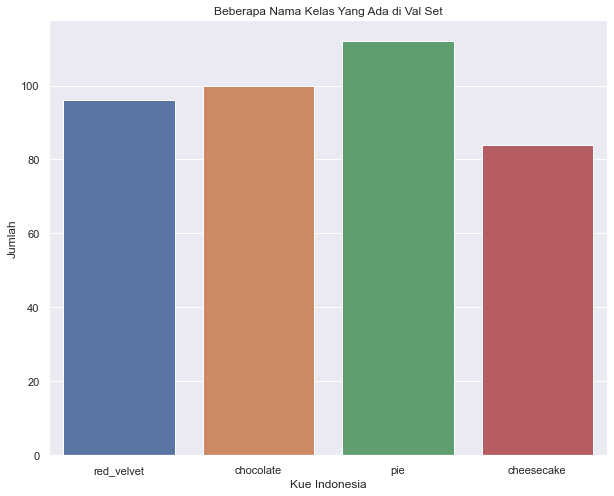

In [91]:
plt.figure(figsize=(10, 8))

sns.set_theme()


sns.countplot(x=labels_val)
plt.xlabel('Kue Indonesia')
plt.ylabel('Jumlah')
plt.title('Beberapa Nama Kelas Yang Ada di Val Set')
plt.show()

In [93]:
#Normalisasi
def normalize_img(image, label):
  return tf.cast(image, tf.float32)/255 , label

#Tambah tingkat keterangan
def random_brightness(image, label):
  return tf.image.random_brightness(image,max_delta=0.7), label

In [94]:
train = train.map(normalize_img).map(random_brightness)
validation = validation.map(normalize_img)
test = test.map(normalize_img)

In [108]:
model = tf.keras.Sequential([

tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=[128, 128, 3]),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Dropout(0.5),

tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Dropout(0.5),

tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Dropout(0.5),

tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),

tf.keras.layers.Flatten(),
tf.keras.layers.Dense(4, activation='softmax')
])

In [97]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 63, 63, 64)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 30, 30, 32)       

In [111]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics=['accuracy'], )

In [99]:
earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
)

In [112]:
hasil1 = model.fit(training_set, epochs=30,validation_data=validation_set,verbose=1,callbacks=[earlyStopping])

Epoch 1/30
52/52 [==============================] - ETA: 0s - loss: 1.3765 - accuracy: 0.3100

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


52/52 [==============================] - 58s 1s/step - loss: 1.3765 - accuracy: 0.3100 - val_loss: 1.3614 - val_accuracy: 0.4898
Epoch 2/30
52/52 [==============================] - 52s 994ms/step - loss: 1.1783 - accuracy: 0.4543 - val_loss: 1.1970 - val_accuracy: 0.4362
Epoch 3/30
52/52 [==============================] - 53s 1s/step - loss: 1.0557 - accuracy: 0.5305 - val_loss: 1.1104 - val_accuracy: 0.5230
Epoch 4/30
52/52 [==============================] - 53s 1s/step - loss: 0.9850 - accuracy: 0.5847 - val_loss: 1.0495 - val_accuracy: 0.6429
Epoch 5/30
52/52 [==============================] - 55s 1s/step - loss: 0.9182 - accuracy: 0.6352 - val_loss: 1.0055 - val_accuracy: 0.6837
Epoch 6/30
52/52 [==============================] - 55s 1s/step - loss: 0.8579 - accuracy: 0.6748 - val_loss: 0.9482 - val_accuracy: 0.6658
Epoch 7/30
52/52 [==============================] - 52s 1s/step - loss: 0.8297 - accuracy: 0.6754 - val_loss: 0.8706 - val_accuracy: 0.6888
Epoch 8/30
52/52 [==========

In [142]:
hasil1 = model.fit(training_set, epochs=10,validation_data=validation_set,verbose=1,callbacks=[earlyStopping])

Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 0.5986 - accuracy: 0.7698

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


52/52 [==============================] - 87s 2s/step - loss: 0.5986 - accuracy: 0.7698 - val_loss: 0.7378 - val_accuracy: 0.7219
Epoch 2/10
52/52 [==============================] - 57s 1s/step - loss: 0.6025 - accuracy: 0.7558 - val_loss: 0.7098 - val_accuracy: 0.7270
Epoch 3/10
52/52 [==============================] - 54s 1s/step - loss: 0.5955 - accuracy: 0.7680 - val_loss: 0.6956 - val_accuracy: 0.7474
Epoch 4/10
52/52 [==============================] - 60s 1s/step - loss: 0.5519 - accuracy: 0.7814 - val_loss: 0.6437 - val_accuracy: 0.7423
Epoch 5/10
52/52 [==============================] - 74s 1s/step - loss: 0.5647 - accuracy: 0.7722 - val_loss: 0.6800 - val_accuracy: 0.7577
Epoch 6/10
52/52 [==============================] - 58s 1s/step - loss: 0.5666 - accuracy: 0.7661 - val_loss: 0.6945 - val_accuracy: 0.7372
Epoch 7/10
52/52 [==============================] - 71s 1s/step - loss: 0.5673 - accuracy: 0.7741 - val_loss: 0.7154 - val_accuracy: 0.7219
Epoch 8/10
52/52 [=============

In [143]:
test_evaluate = model.evaluate(test_set, verbose=0)
print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {test_evaluate[1]}')

Test loss     : 0.6620402932167053
Test accuracy : 0.78515625


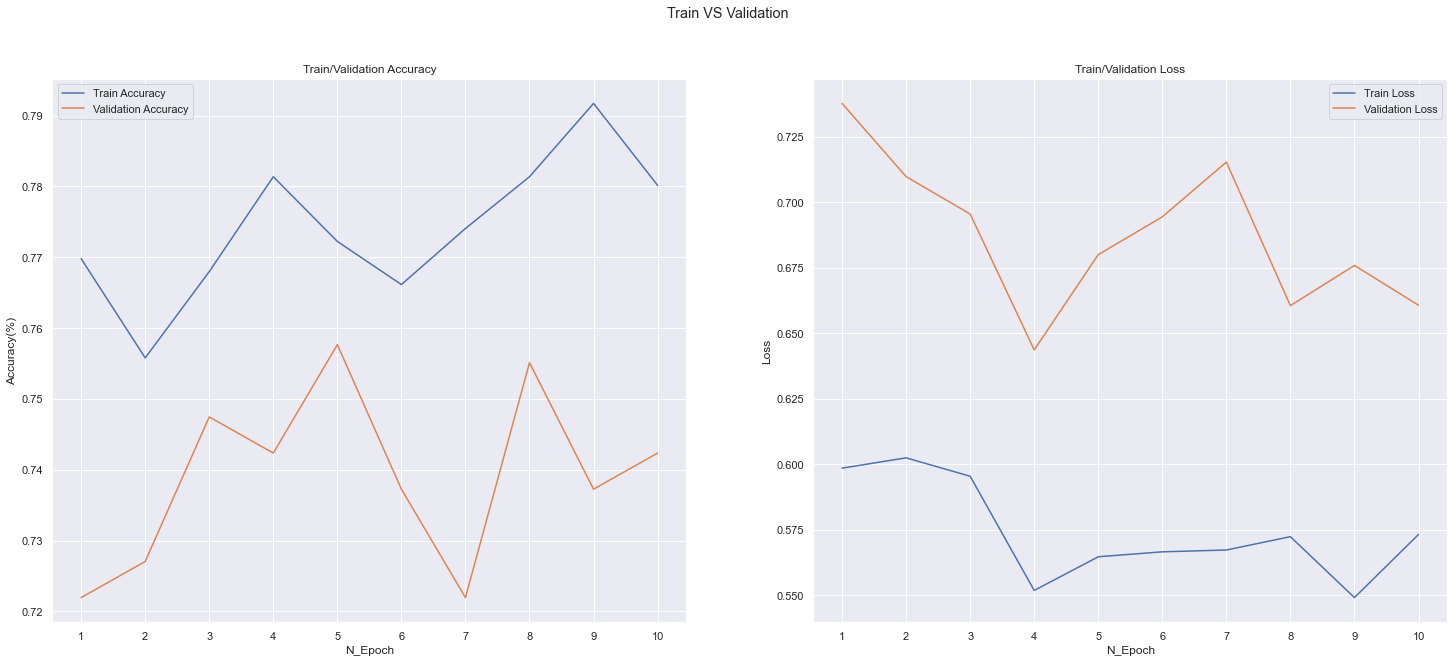

In [145]:
epoch = [i+1 for i in range(10)]


plt.figure(figsize=(25, 10))
plt.suptitle('Train VS Validation')

#Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch,y = hasil1.history['accuracy'],label ='Train Accuracy')
sns.lineplot(x=epoch,y = hasil1.history['val_accuracy'],label ='Validation Accuracy')

plt.xticks(epoch)
plt.ylabel('Accuracy(%)')
plt.xlabel('N_Epoch')
plt.title("Train/Validation Accuracy")

#Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch,y = hasil1.history['loss'],label ='Train Loss')
sns.lineplot(x=epoch,y = hasil1.history['val_loss'],label ='Validation Loss')

plt.xticks(epoch)
plt.title("Train/Validation Loss")
plt.xlabel('N_Epoch')
plt.ylabel('Loss')
plt.show()

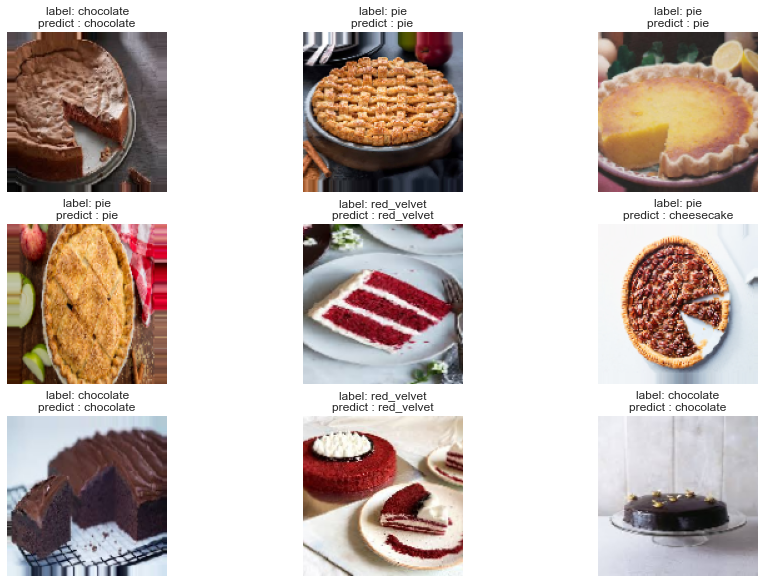

In [138]:
image ,label = next(iter(test_set))


plt.figure(figsize=(15,10))
for i in range(9) :
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}\npredict : {class_names[y_pred]}')

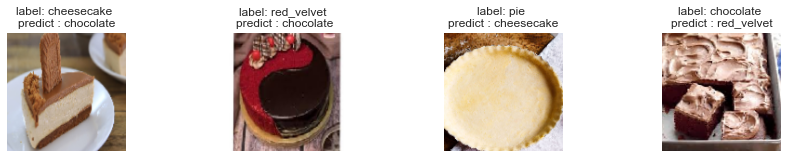

In [131]:
#Plot prediction Error
plt.figure(figsize=(15,10))

i = 0
j = 0
while (j < 4):
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(4,4,j+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))

    if (TrueLabel != class_names[y_pred]):
        plt.imshow(tf.squeeze(image[i]))
        plt.title(f'label: {TrueLabel} \npredict : {class_names[y_pred]}')
        j+=1
    i+=1

In [ ]:
test_pred = model.predict(test_set)
test_pred_labes = np.argmax(test_pred,axis = 1)
test_labels1 = np.concatenate([y for x, y in test_set], axis=0)
test_labels = [np.argmax(y) for y in test_labels1]

In [ ]:
plt.figure(figsize=(20, 16))
cm = confusion_matrix(test_labels,test_pred_labes)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_names,yticklabels=class_names)
plt.title("Confusion Matrix - Test Set")
plt.show()

In [ ]:
#Classification Report
print('Classification Report')
print(classification_report(test_pred_labes, test_labels, target_names=class_names))